In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
news=pd.read_csv ("D://Data Science/Data/NewspaperData.csv")

In [4]:
news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


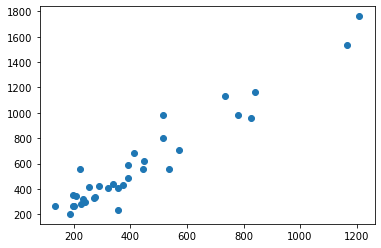

In [5]:
plt.scatter(news.daily,news.sunday)

In [7]:
news.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


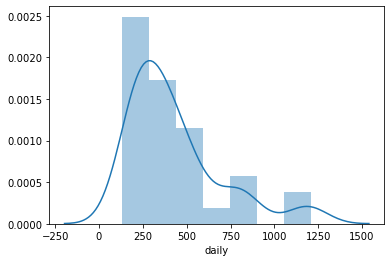

In [8]:
sns.distplot(news['daily'])

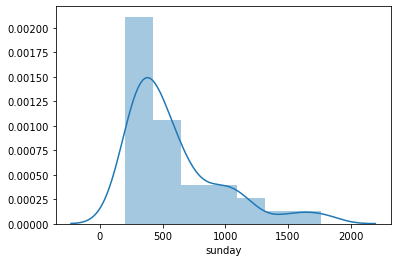

In [9]:
sns.distplot(news['sunday'])

In [12]:
#build model
model=smf.ols("sunday~daily",data=news).fit()

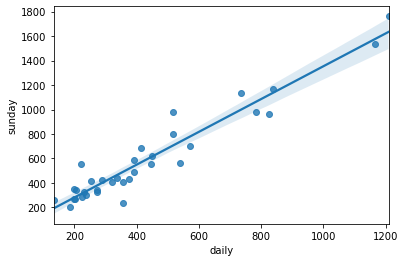

In [13]:
sns.regplot(x='daily',y='sunday',data=news)

In [14]:
#coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [20]:
#t and p values to check B1 =0 or B1 <> 0 (Hypothesis test). This case p<.05 so Ha
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [21]:
#R2 Squares values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [30]:
#predict
news1=pd.Series([200])

In [31]:
news1

0    200
dtype: int64

In [34]:
#predict
news_pred=pd.DataFrame(news1,columns=['daily'])

In [35]:
news_pred

,daily
0,200


In [36]:
#Prediction for 200 news paper of daily
model.predict(news_pred)

0    281.778581
dtype: float64

In [37]:
# to cross check the above sunday value
13.835630+(1.339715*200)

281.77862999999996

In [38]:
#predict
news2=pd.Series([200,300])

In [43]:
#predict
news_pred2=pd.DataFrame(news2,columns=['daily'])


In [45]:
news_pred2

,daily
0,200
1,300


In [46]:
model.predict(news_pred2)

0    281.778581
1    415.750057
dtype: float64